In [1]:
%config Completer.use_jedi = False

from utils import *
from parallel import to_run, findpos, find_relaxation, do_find_decorrelation_time

import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import importlib
from multiprocessing import Pool
from tqdm.notebook import tqdm
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.dpi"] = 72
plt.rcParams["figure.figsize"] = [12,8]

from ising_model import SimulateMH

In [3]:
pool = Pool(4)

In [2]:
scale = 40*16
Ts=np.linspace(0,4.5,scale+1)[1:]

In [ ]:
results = []
for T in tqdm(Ts):
    res = do_find_decorrelation_time(
        T, 32,32,10**9,10,np.random.randint(0,1000000))
    results.append(res)

In [ ]:
results = []
for Ts1 in tqdm(Ts.reshape(40,16)):
    runs = len(Ts1)
    res = pool.starmap(do_find_decorrelation_time, #T, N, M, steps
            zip(*(Ts1,
                  [32]*runs, # N
                  [32]*runs, # M
                  [10**9]*runs, # steps
                  [10]*runs, # freq
                  np.random.randint(0,1000000, runs), # seed
                      )),
#             chunksize=1
        )
    results+= res

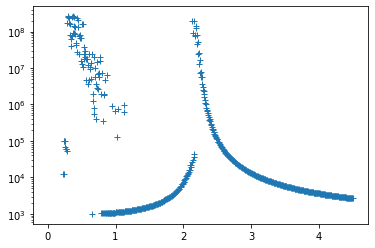

In [6]:
plt.plot(Ts.flatten()[:len(results)], results, "+")
plt.gca().set_yscale("log")